In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, Activation,
                          Add, GlobalAveragePooling2D, Dense, Dropout)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# ResNet Block
def resnet_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
# Build ResNet Model
def build_resnet():
    inputs = Input(shape=(28, 28, 1))

    x = Conv2D(64, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 256, stride=2)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [ ]:
# Build and Compile Model
model = build_resnet()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

In [ ]:
# Train
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop],
    steps_per_epoch=len(X_train) // 64
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 56s 44ms/step - accuracy: 0.6367 - loss: 0.9709 - val_accuracy: 0.7861 - val_loss: 0.5568 - learning_rate: 0.0010
Epoch 2/100
  1/937 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.7812 - loss: 0.4768

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.4768 - val_accuracy: 0.7734 - val_loss: 0.5778 - learning_rate: 0.0010
Epoch 3/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 58s 29ms/step - accuracy: 0.8257 - loss: 0.4840 - val_accuracy: 0.8494 - val_loss: 0.3872 - learning_rate: 0.0010
Epoch 4/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8750 - loss: 0.4873 - val_accuracy: 0.8538 - val_loss: 0.3821 - learning_rate: 0.0010
Epoch 5/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8607 - loss: 0.3875 - val_accuracy: 0.8433 - val_loss: 0.4100 - learning_rate: 0.0010
Epoch 6/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9062 - loss: 0.2186 - val_accuracy: 0.8466 - val_loss: 0.3986 - learning_rate: 0.0010
Epoch 7/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.8782 - loss: 0.3451 - val_accuracy: 0.8744 - val_loss: 0.3401 - learning_rate: 0.0010
Epoch 8/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2634 -

In [ ]:
# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9372 - loss: 0.1895

Test accuracy: 0.9360


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


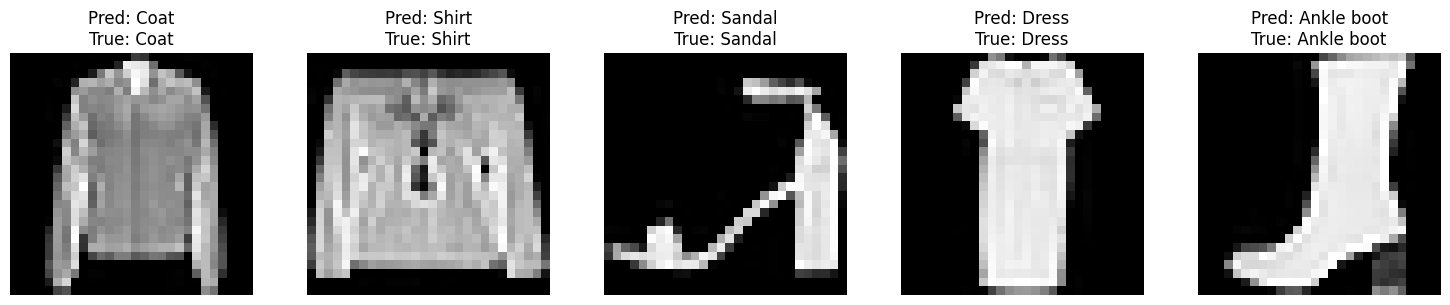

In [ ]:
# Visualization Function
def display_predictions(num_images=5):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    indices = np.random.randint(0, X_test.shape[0], num_images)
    predictions = model.predict(X_test[indices])

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        predicted_class = class_names[np.argmax(predictions[i])]
        true_class = class_names[np.argmax(y_test[idx])]
        plt.title(f'Pred: {predicted_class}\nTrue: {true_class}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_predictions()